<a href="https://colab.research.google.com/github/pmama/TSA/blob/main/MSFT_stock_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pystan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline
import seaborn as sns
from numpy import log
import datetime as dt
import yfinance as yf

In [3]:
import warnings
warnings.filterwarnings('ignore')

# **Date Range of 5 years**

In [4]:
end = dt.datetime.today()
start = (end - dt.timedelta(days = (365*5)))

In [5]:
print('Starting Date : ', start, '\nEnding Date : ', end)

Starting Date :  2018-10-23 15:40:45.916211 
Ending Date :  2023-10-22 15:40:45.916211


# **Downloading  Microsoft data from yahoo finance**

In [6]:
# downloading Historical Dataset
ticks =['MSFT']
df = yf.download(ticks, start, end )

[*********************100%%**********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-23,107.769997,108.970001,105.110001,108.099998,102.417343,43770400
2018-10-24,108.410004,108.489998,101.589996,102.320000,96.941200,63897800
2018-10-25,106.550003,109.269997,106.150002,108.300003,102.606827,61646800
2018-10-26,105.690002,108.750000,104.760002,106.959999,101.337280,55523100
2018-10-29,108.110001,108.699997,101.629997,103.849998,98.390762,55162000


Text(0.5, 1.0, 'STOCK OF MICROSOFT FOR LAST 5 YEARS')

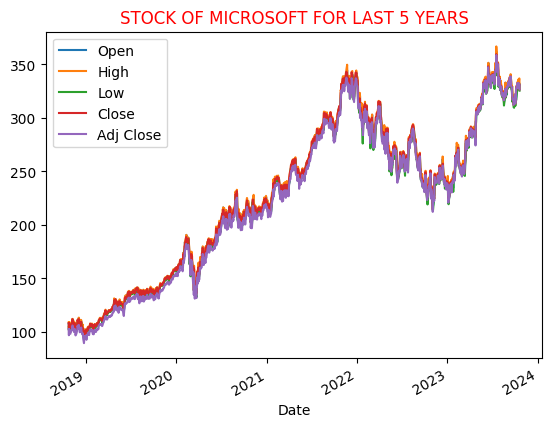

In [8]:
# For better visibility volume is excluded.
df.iloc[:,:-1].plot()
plt.title('STOCK OF MICROSOFT FOR LAST 5 YEARS', color ='red')

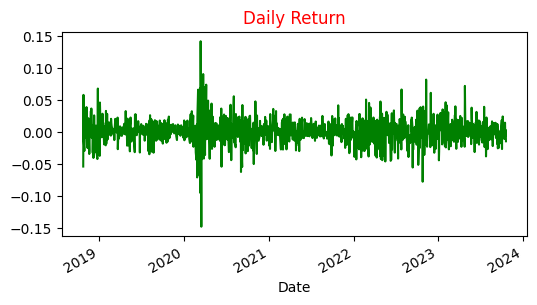

In [9]:
daily_return = df['Adj Close'].pct_change()
daily_return.plot(color ='green',figsize=(6,3))
plt.title('Daily Return', color='red')
plt.show()

# **Prophet Model**
[Prophet](https://facebook.github.io/prophet/) is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

## **Getting ready for building Prophet model**
*Creating dataframe for prophet model with datestamp (ds) and dependendent variable (y)*

In [10]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-23,107.769997,108.970001,105.110001,108.099998,102.417343,43770400
1,2018-10-24,108.410004,108.489998,101.589996,102.320000,96.941200,63897800
2,2018-10-25,106.550003,109.269997,106.150002,108.300003,102.606827,61646800
3,2018-10-26,105.690002,108.750000,104.760002,106.959999,101.337280,55523100
4,2018-10-29,108.110001,108.699997,101.629997,103.849998,98.390762,55162000
...,...,...,...,...,...,...,...
1252,2023-10-16,331.049988,336.140015,330.600006,332.640015,332.640015,22158000
1253,2023-10-17,329.589996,333.459991,327.410004,332.059998,332.059998,18338500
1254,2023-10-18,332.489990,335.589996,328.299988,330.109985,330.109985,23153600
1255,2023-10-19,332.149994,336.880005,330.910004,331.320007,331.320007,25052100


# **Close Price Prediction**

In [11]:
df = df[['Date', 'Close']]
df.rename(columns ={"Date" : 'ds', 'Close' :'y' }, inplace= True)
df.head()

,ds,y
0,2018-10-23,108.099998
1,2018-10-24,102.320000
2,2018-10-25,108.300003
3,2018-10-26,106.959999
4,2018-10-29,103.849998


In [12]:
ts = df['y']

# **Auto Correlation check by Durbin Watson Test**

In [13]:
import statsmodels.api as sm
dw_test = sm.stats.durbin_watson(ts)
print('Result of Durbin Watson Test', dw_test)
if abs(dw_test)<= 1.5 or abs(dw_test)>=2.5:
  print('Auto-Correlation is detected. Problem is suitable for Time Series Forecast')
else:
  print('No auto-Correlation is detected. Problem is not suitable for Time Series Forecast')

Result of Durbin Watson Test 0.0003325188866450749
Auto-Correlation is detected. Problem is suitable for Time Series Forecast


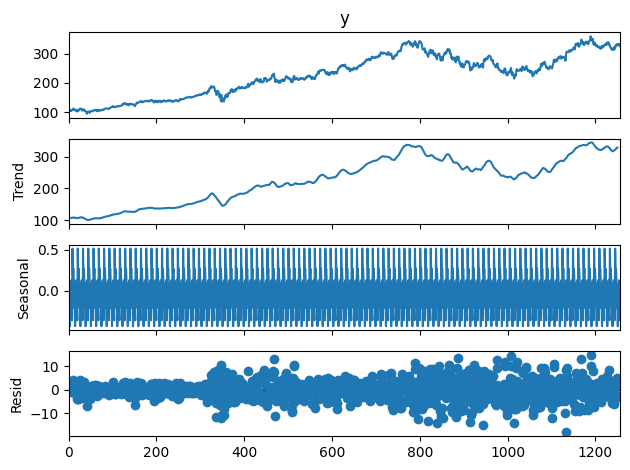

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_add = seasonal_decompose(ts, model = 'additive', period =12)
decompose_add.plot()
plt.show()

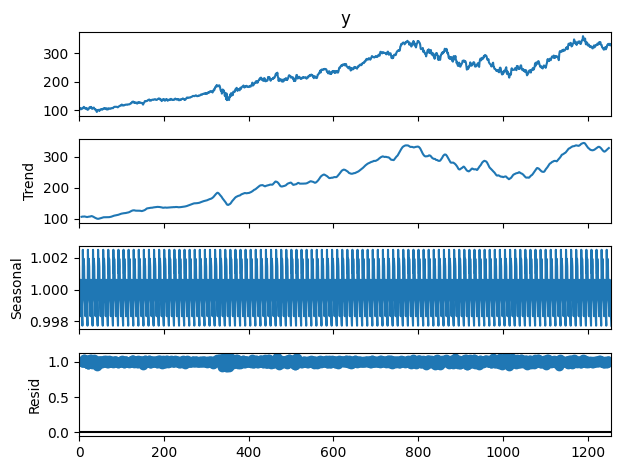

In [15]:
decompose_mul = seasonal_decompose(ts, model = 'multiplicative', period =12)
decompose_mul.plot()
plt.show()

# **Simple Moving Average**

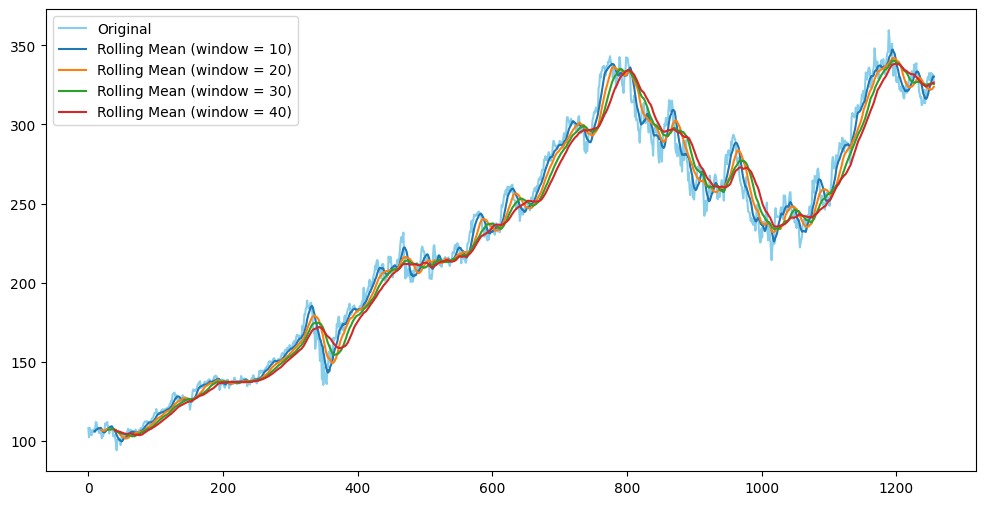

In [16]:
windows =[10,20,30,40]
plt.figure(figsize =(12,6))
ts.plot(color = 'skyblue', label ='Original')
for window in windows:
  mean_rolling = ts.rolling(window = window).mean()
  #std_rolling = ts.rolling(window = window).std()

  mean_rolling.plot( label =f'Rolling Mean (window = {window})')
  #std_rolling.plot( label =f'STD Mean (window = {window})')
  plt.legend()
plt.show()




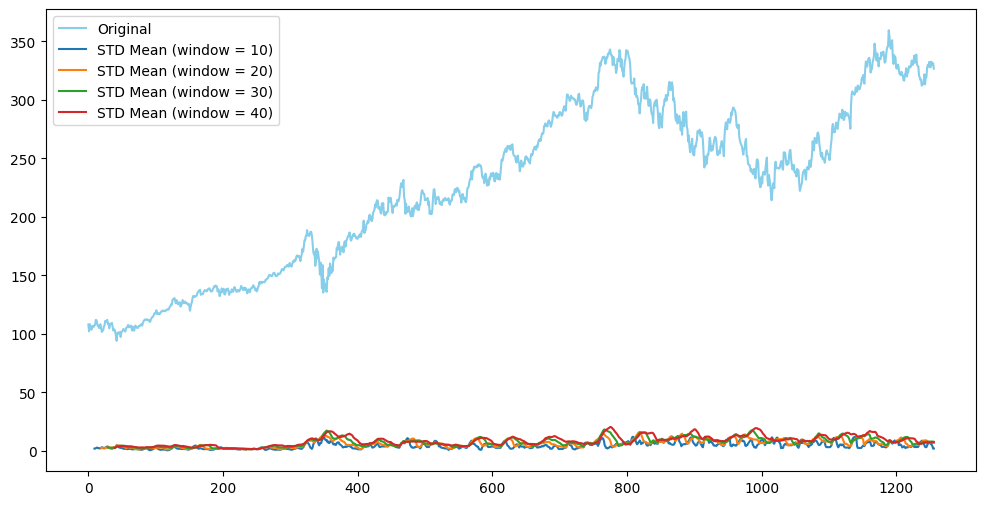

In [17]:
windows =[10,20,30,40]
plt.figure(figsize =(12,6))
ts.plot(color = 'skyblue', label ='Original')
for window in windows:
  #mean_rolling = ts.rolling(window = window).mean()
  std_rolling = ts.rolling(window = window).std()

  #mean_rolling.plot( label =f'Rolling Mean (window = {window})')
  std_rolling.plot( label =f'STD Mean (window = {window})')
  plt.legend()
plt.show()

# **Exponential Moving average (EWM)**

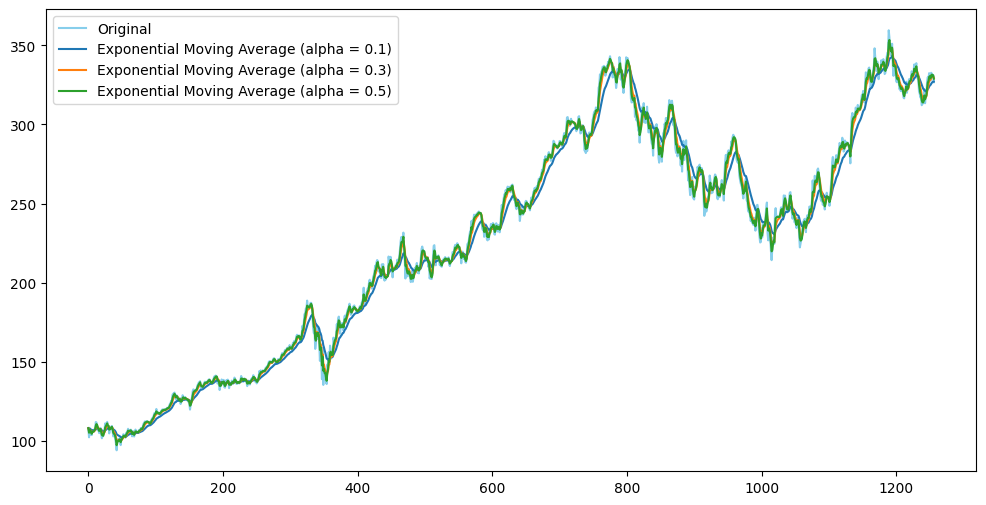

In [18]:
sfactor_list =[0.1,0.3,0.5]
plt.figure(figsize =(12,6))
ts.plot(color = 'skyblue', label ='Original')
for sf in sfactor_list:

  mean_ewm = ts.ewm(alpha = sf, adjust = False).mean()

  mean_ewm.plot( label =f'Exponential Moving Average (alpha = {sf})')

  plt.legend()
plt.show()

# **Stationarity Check**

In [19]:
from statsmodels.tsa.stattools import adfuller
def adf_test_summary(data):
    print('==='*20)
    print('The summary of Augmented Dickey Fuller test is :')

    labels =['ADFullerTest_statistics', 'P_value', 'No. of Lags_used',
             'No. of Observation_used', 'critical_values',
             'Maximized Information Criterion (AIC or BIC)' ]

    print('==='*20)
    ts = data
    adf_test = adfuller(ts)
    P_value = adf_test[1]

    for label, res in zip(labels,adf_test):
        print (f'{label} :{res}' )

    print()
    print('==='*20)
    print('Checking Stationary:')
    print('==='*20)
    if P_value <= 0.05:
        print('P_value', P_value, ': P_value  ≤ 0.05 ')
        print('Strong Evidence against Null Hypothesis')
        print('Time Series is Stationary')
    else:
        print('P_value =', P_value, ': P_value > 0.05 ')
        print('Weak Evidence against Null Hypothesis')
        print('Time Series is Non-Stationary')



In [20]:
adf_test_summary(ts)

The summary of Augmented Dickey Fuller test is :
ADFullerTest_statistics :-1.1566444473930273
P_value :0.691962780795036
No. of Lags_used :9
No. of Observation_used :1247
critical_values :{'1%': -3.4356048614183443, '5%': -2.8638605461891617, '10%': -2.5680054872544145}
Maximized Information Criterion (AIC or BIC) :7099.3661628055015

Checking Stationary:
P_value = 0.691962780795036 : P_value > 0.05 
Weak Evidence against Null Hypothesis
Time Series is Non-Stationary


In [21]:
#1st difference
adf_test_summary(ts.diff().dropna())

The summary of Augmented Dickey Fuller test is :
ADFullerTest_statistics :-11.723197604698196
P_value :1.397410545056252e-21
No. of Lags_used :8
No. of Observation_used :1247
critical_values :{'1%': -3.4356048614183443, '5%': -2.8638605461891617, '10%': -2.5680054872544145}
Maximized Information Criterion (AIC or BIC) :7094.081483348444

Checking Stationary:
P_value 1.397410545056252e-21 : P_value  ≤ 0.05 
Strong Evidence against Null Hypothesis
Time Series is Stationary


In [22]:
# Seasonality
adf_test_summary(ts.diff(12).dropna())

The summary of Augmented Dickey Fuller test is :
ADFullerTest_statistics :-8.11167175243424
P_value :1.2211479749384905e-12
No. of Lags_used :21
No. of Observation_used :1223
critical_values :{'1%': -3.4357081998138064, '5%': -2.863906139614306, '10%': -2.568029768447359}
Maximized Information Criterion (AIC or BIC) :7495.166122388739

Checking Stationary:
P_value 1.2211479749384905e-12 : P_value  ≤ 0.05 
Strong Evidence against Null Hypothesis
Time Series is Stationary


# **Train - Test Splitting**

In [23]:
# Last 30 rows
test_data = df[len(df)-60 :]
test_data.tail()

,ds,y
1252,2023-10-16,332.640015
1253,2023-10-17,332.059998
1254,2023-10-18,330.109985
1255,2023-10-19,331.320007
1256,2023-10-20,326.670013


In [24]:
test_data.head()

,ds,y
1197,2023-07-28,338.369995
1198,2023-07-31,335.920013
1199,2023-08-01,336.339996
1200,2023-08-02,327.500000
1201,2023-08-03,326.660004


In [25]:
train_data = df[:len(df)-60]
train_data

,ds,y
0,2018-10-23,108.099998
1,2018-10-24,102.320000
2,2018-10-25,108.300003
3,2018-10-26,106.959999
4,2018-10-29,103.849998
...,...,...
1192,2023-07-21,343.769989
1193,2023-07-24,345.109985
1194,2023-07-25,350.980011
1195,2023-07-26,337.769989


# **Prophet Model**

In [26]:
from prophet import Prophet
model = Prophet(daily_seasonality= True)
model.fit(train_data)
future = model.make_future_dataframe(periods = 180, freq= 'd')
forecast = model.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0a37lnf/pn46h722.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0a37lnf/so12t_fc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77552', 'data', 'file=/tmp/tmpo0a37lnf/pn46h722.json', 'init=/tmp/tmpo0a37lnf/so12t_fc.json', 'output', 'file=/tmp/tmpo0a37lnf/prophet_modelnbgq9y40/prophet_model-20231022154055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:40:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:40:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


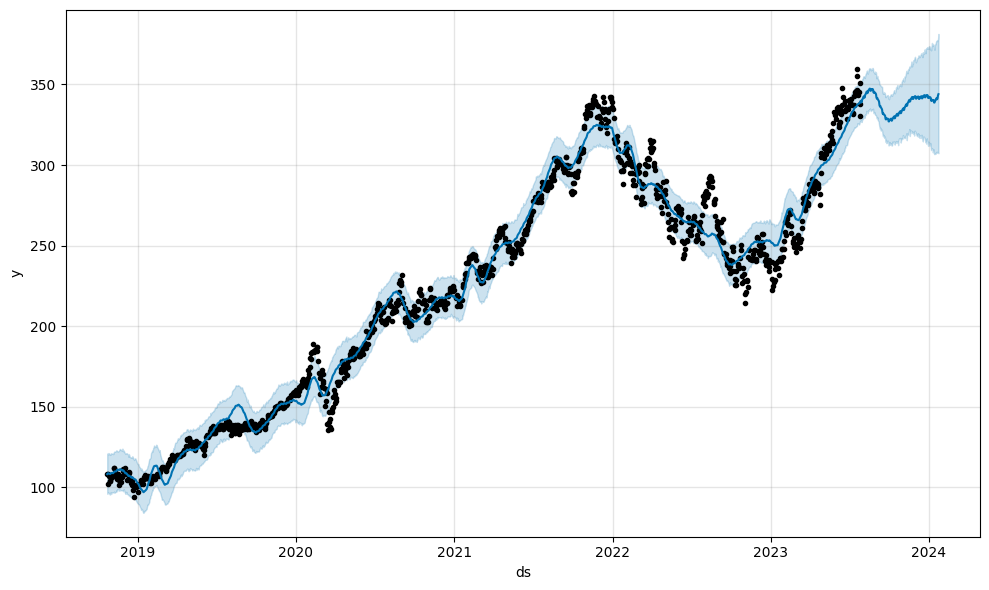

In [27]:
model.plot(forecast)
plt.show()

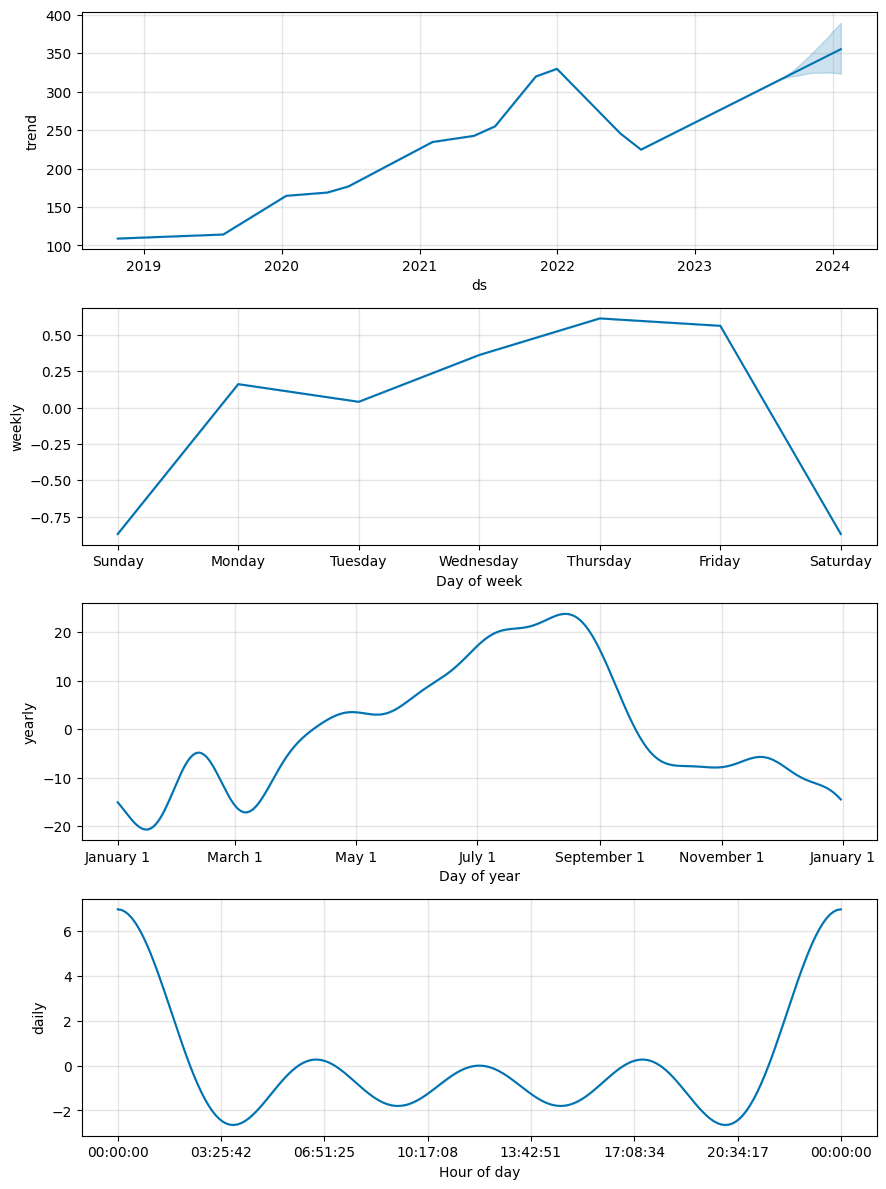

In [28]:
model.plot_components(forecast)
plt.show()

# **Interactive visualisation**

In [29]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)


In [30]:
plot_components_plotly(model,forecast)


In [31]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-10-23,108.975796,96.043077,120.989494,108.975796,108.975796,-0.761445,-0.761445,-0.761445,6.963163,...,0.039945,0.039945,0.039945,-7.764553,-7.764553,-7.764553,0.0,0.0,0.0,108.214351
1,2018-10-24,108.994730,96.918786,120.573423,108.994730,108.994730,-0.469432,-0.469432,-0.469432,6.963163,...,0.362221,0.362221,0.362221,-7.794815,-7.794815,-7.794815,0.0,0.0,0.0,108.525298
2,2018-10-25,109.013664,96.380108,120.555334,109.013664,109.013664,-0.246495,-0.246495,-0.246495,6.963163,...,0.613971,0.613971,0.613971,-7.823629,-7.823629,-7.823629,0.0,0.0,0.0,108.767168


### **Actual Vs. Prediction**

In [32]:
# predicted value for 13th October 2023
oct13_2023_pred =forecast[forecast.ds == '2023-10-13']['yhat']
oct13_2023_pred

1274    330.178337
Name: yhat, dtype: float64

In [33]:
# actual value for 13th October 2023
oct13_2023_actual = test_data[test_data.ds == '2023-10-13']['y']
oct13_2023_actual

1251    327.730011
Name: y, dtype: float64

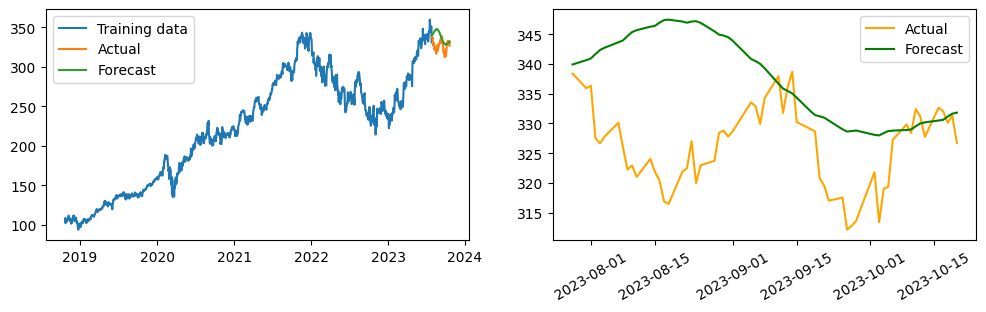

In [34]:
pred = forecast[forecast.ds.isin(test_data.ds)]
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot(train_data.ds, train_data['y'], label='Training data')
plt.plot(test_data.ds, test_data['y'], label='Actual', )
plt.plot(test_data.ds, pred['yhat'], label='Forecast')
plt.legend()
plt.subplot(1,2,2)
plt.plot(test_data.ds, test_data['y'], label='Actual', color = 'orange')
plt.plot(test_data.ds, pred['yhat'], label='Forecast', color = 'green')
plt.legend()
plt.xticks(rotation=30)
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

actual = test_data[['y','ds']]
pred =  forecast[['yhat','ds']][len(train_data):]

merged_data = actual.merge(pred, on='ds')

# Calculate MAPE
mape = mean_absolute_percentage_error(merged_data['y'], merged_data['yhat'])
print("MAPE:", mape)
# Calculate MSE
mse = mean_squared_error(merged_data['y'], merged_data['yhat'], squared = True)
print("MSE:", mse)
# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)


MAPE: 0.03690038009557153
MSE: 220.82120151435646
RMSE: 14.860053886657223


# **Crossvalidation of the model**

In [36]:
from prophet.diagnostics import cross_validation, performance_metrics

In [37]:

df_cv = cross_validation(model, horizon = '30days', period ='15days', initial='180days')

INFO:prophet:Making 102 forecasts with cutoffs between 2019-05-04 00:00:00 and 2023-06-27 00:00:00


  0%|          | 0/102 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0a37lnf/gfsza2mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0a37lnf/rpx3vt9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66850', 'data', 'file=/tmp/tmpo0a37lnf/gfsza2mc.json', 'init=/tmp/tmpo0a37lnf/rpx3vt9i.json', 'output', 'file=/tmp/tmpo0a37lnf/prophet_model_rhu6ywc/prophet_model-20231022154104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:41:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0a37lnf/jgkjema7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0a37lnf/vkuzau31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [38]:
len(df_cv)

2109

In [39]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
2104,2023-07-21,330.019796,318.351680,342.901961,343.769989,2023-06-27
2105,2023-07-24,330.242502,317.464183,341.790675,345.109985,2023-06-27
2106,2023-07-25,330.352865,317.559055,343.246991,350.980011,2023-06-27
2107,2023-07-26,330.904623,318.704540,343.959544,337.769989,2023-06-27
2108,2023-07-27,331.457497,317.981145,343.566710,330.720001,2023-06-27


In [40]:
performance = performance_metrics(df_cv)
performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,236.041622,15.363646,11.064930,0.044595,0.032389,0.045107,0.369538
1,4 days,249.746329,15.803364,11.440657,0.047189,0.030585,0.047729,0.366600
2,5 days,246.658232,15.705357,11.464930,0.048074,0.035183,0.048588,0.358333
3,6 days,253.068753,15.908135,11.899342,0.051132,0.038286,0.051477,0.354167
4,7 days,262.813238,16.211516,12.151645,0.052261,0.041655,0.052669,0.344694
5,8 days,292.887865,17.113967,12.938483,0.055285,0.044012,0.055744,0.337823
6,9 days,332.147815,18.224923,13.842272,0.059972,0.046686,0.060590,0.323810
7,10 days,377.431713,19.427602,14.990161,0.066271,0.046808,0.067155,0.303361
8,11 days,398.588794,19.964689,15.631652,0.071293,0.052824,0.072524,0.276587
9,12 days,421.743512,20.536395,15.991171,0.073990,0.053273,0.075370,0.252381


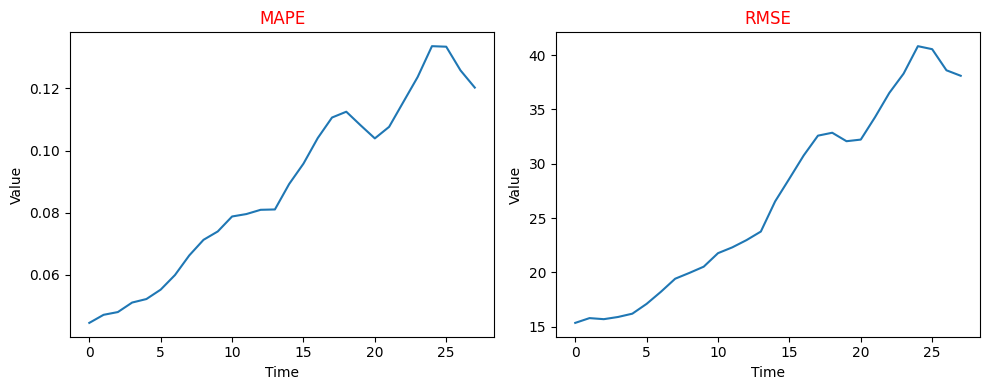

In [41]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(performance['mape'])
plt.title('MAPE', color='red')
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.plot(performance['rmse'])
plt.title('RMSE', color='red')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

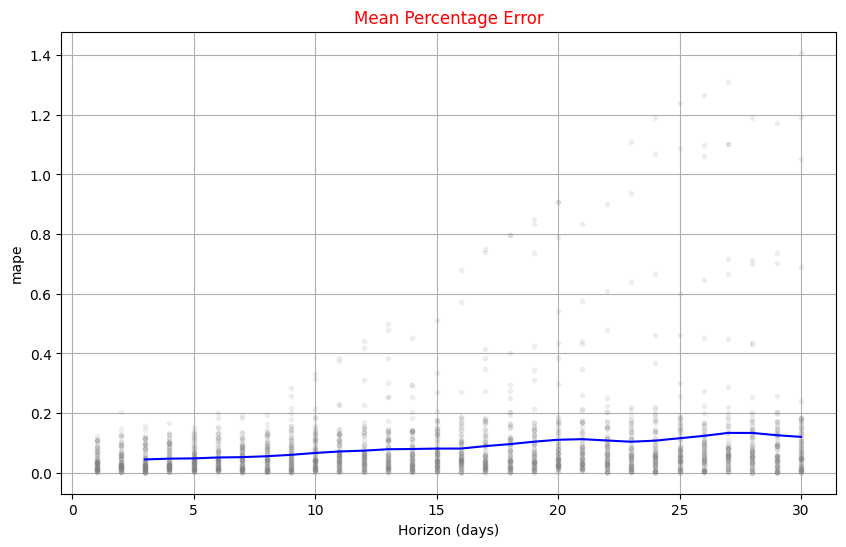

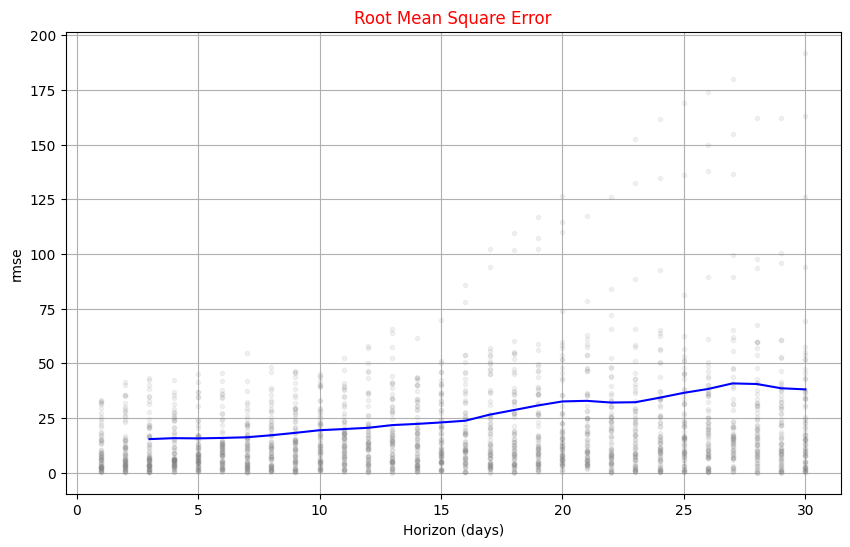

In [42]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric ='mape')
plt.title('Mean Percentage Error', color= 'red')
plot_cross_validation_metric(df_cv, metric ='rmse')
plt.title('Root Mean Square Error', color='red')
plt.show()